 #                   Business Case: Data Exploration and Visualization

---







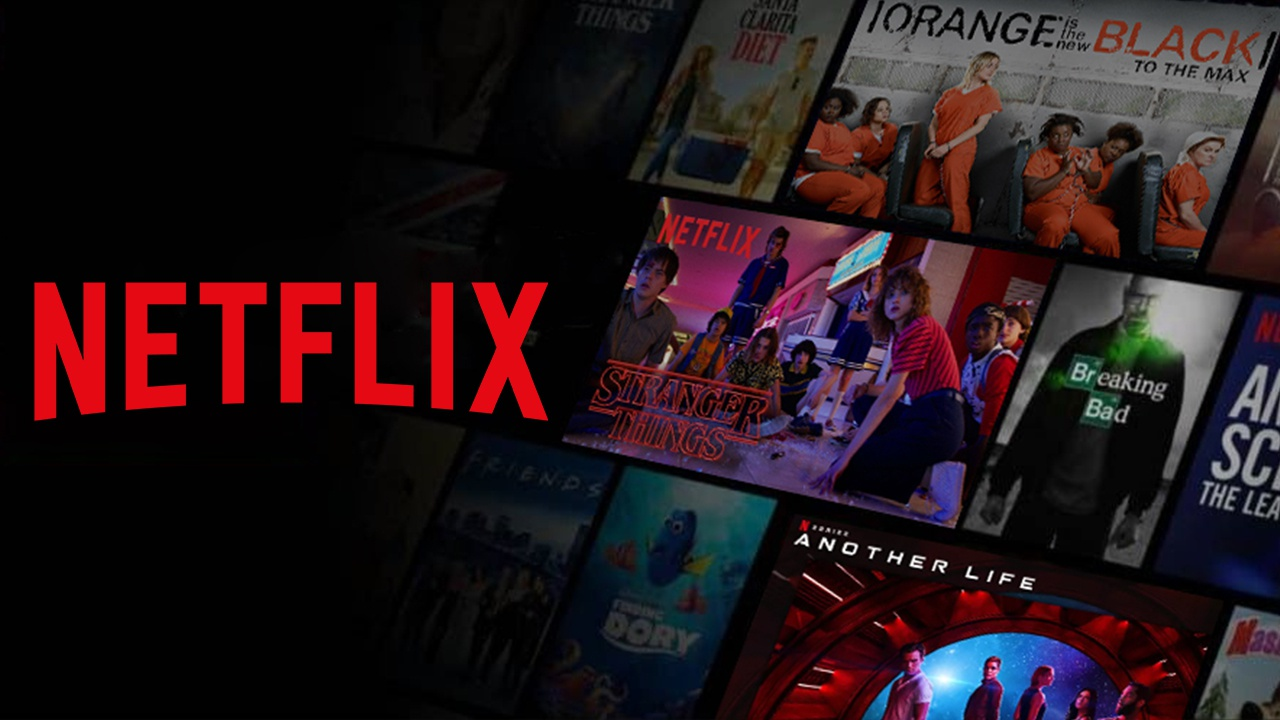

# Introduction :




Netflix is one of the most popular media and video streaming platforms globally, offering more than 10,000 movies and TV shows. As of mid-2021, Netflix had over 222 million subscribers worldwide. The provided dataset contains detailed information about each title on Netflix, including attributes like cast, director, release year, genre, and more.

# Bussiness Problem :

The goal of this project is to analyze Netflix’s catalog to generate actionable insights that can help the company decide:

* What types of shows or movies to produce next.
* How to expand its presence and grow its business in different countries.

# Objective :

The objective of this project is to perform data exploration and visualization on Netflix’s dataset to identify meaningful trends, patterns, and business insights that can support strategic decisions regarding content creation, audience targeting, and regional growth.

# Concepts used :

| Concept                             | Description / Use                                                                                                     |
| ----------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **Exploratory Data Analysis (EDA)** | The process of understanding data — summarizing, cleaning, and identifying patterns or relationships before modeling. |
| **Data Cleaning**                   | Handling missing values, duplicates, incorrect formats, and inconsistent entries.                                     |
| **Data Profiling**             | Converting categorical data to category types and splitting multi-value columns (like genre or cast).                 |
| **Feature Extraction**              | Extracting additional features such as *year*, *month*, or *duration type* for deeper analysis.                       |
| **Statistical Summary**             | Using functions like `.describe()` to understand data distribution (mean, median, mode, count).                       |


# Setting up the Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report, accuracy_score

# Dataset Link :

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv - netflix.csv

--2025-11-04 11:37:56--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.183, 108.157.172.173, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  2.52MB/s    in 1.3s    

2025-11-04 11:37:59 (2.52 MB/s) - ‘netflix.csv’ saved [3399671/3399671]

--2025-11-04 11:37:59--  http://-/
Resolving - (-)... failed: Name or service not known.
wget: unable to resolve host address ‘-’
--2025-11-04 11:37:59--  http://netflix.csv/
Resolving netflix.csv (netflix.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘netflix.csv’
FINISHED --2025-11-04 11:37:59--
Total wall clock time: 2.2s
Downloaded: 1 files,

In [3]:
df=pd.read_csv('/content/netflix.csv')

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Dataset Overview :





| Attribute        | Description                                |
| ---------------- | ------------------------------------------ |
| **Show_ID**      | Unique ID for every movie/TV show          |
| **Type**         | Identifies whether it’s a Movie or TV Show |
| **Title**        | Name of the movie or show                  |
| **Director**     | Director’s name                            |
| **Cast**         | Actors involved in the movie/show          |
| **Country**      | Country where the movie/show was produced  |
| **Date_Added**   | Date when it was added to Netflix          |
| **Release_Year** | Year of release                            |
| **Rating**       | TV rating (like TV-MA, PG, etc.)           |
| **Duration**     | Total duration (minutes or seasons)        |
| **Listed_in**    | Genre or category                          |
| **Description**  | Short summary of the movie/show            |


# Data Profiling :

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.shape

(8807, 12)

In [8]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [10]:

null_details = df.isna().sum() / len(df) * 100
print('\033[1m' + 'Percentages of null' + '\033[0m')
print(null_details.sort_values(ascending = False)[:6])

Percentages of null
director      29.908028
country        9.435676
cast           9.367549
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64


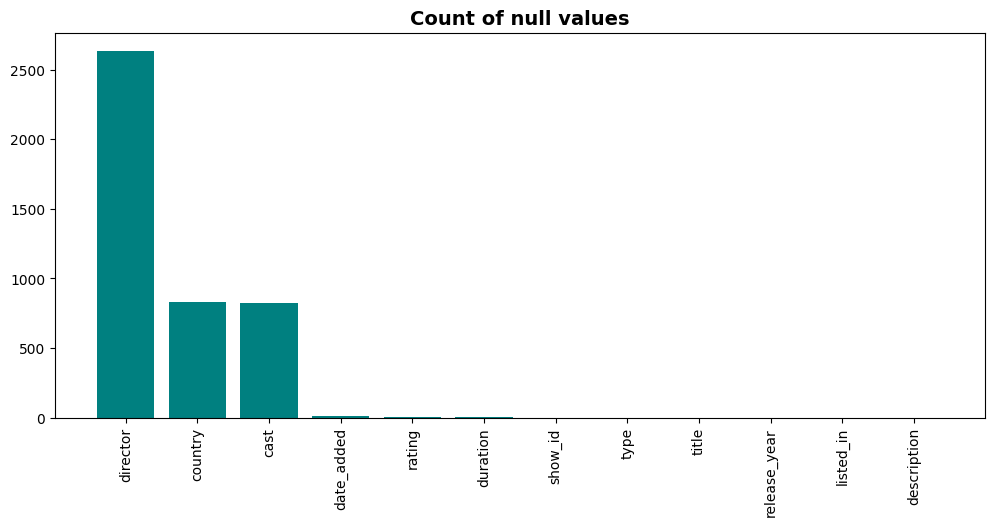

In [11]:
null_values = df.isna().sum().sort_values(ascending=False)
plt.figure(figsize= (12,5))
plt.bar(null_values.index,null_values , color='teal')
plt.xticks(rotation = 90)
plt.title('Count of null values' , fontsize = 14 , fontweight = 'bold')
plt.show()

In [12]:
df['type'].value_counts(normalize=True)

,proportion
type,
Movie,0.696151
TV Show,0.303849


###Observation:

* The dataset has 8,800 records and 11 columns
* Most of the null values are from director, country, cast
* The dataset is imbalanced where 70 % of data is into Movies and 30% into TV Show






# Data Cleaning :

In [13]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [14]:
df['director']

,director
0,Kirsten Johnson
1,NaN
2,Julien Leclercq
3,NaN
4,NaN
...,...
8802,David Fincher
8803,NaN
8804,Ruben Fleischer
8805,Peter Hewitt


In [15]:
df['director'].fillna('unknown' , inplace = True)

In [16]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [17]:
df['cast']

,cast
0,NaN
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,NaN
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,NaN
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [18]:
df['cast'].fillna('unknown' , inplace = True)

In [19]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,831
date_added,10
release_year,0
rating,4
duration,3


In [20]:
df['country']

,country
0,United States
1,South Africa
2,NaN
3,NaN
4,India
...,...
8802,United States
8803,NaN
8804,United States
8805,United States


In [21]:
df['country'].mode()

,country
0,United States


In [22]:
df['country'].fillna('United States',inplace=True)

In [23]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [24]:
df['date_added'].mode()

,date_added
0,"January 1, 2020"


In [25]:
df['date_added'].fillna(' January 1, 2020',inplace=True)

/tmp/ipython-input-133653104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna(' January 1, 2020',inplace=True)


In [26]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,4
duration,3


In [27]:
df['rating'].mode()

,rating
0,TV-MA


In [28]:
df['rating'].fillna('0 TV-MA',inplace=True)

/tmp/ipython-input-1318977687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('0 TV-MA',inplace=True)


In [29]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,3


In [30]:
df['duration'].mode()

,duration
0,1 Season


In [31]:
df['duration'].fillna(' 1 Season',inplace=True)

/tmp/ipython-input-3454873123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(' 1 Season',inplace=True)


In [32]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [33]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,unknown,unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Uni-Variate Analysis :

### How has the number of movies released per year changed over the last 20-30 years

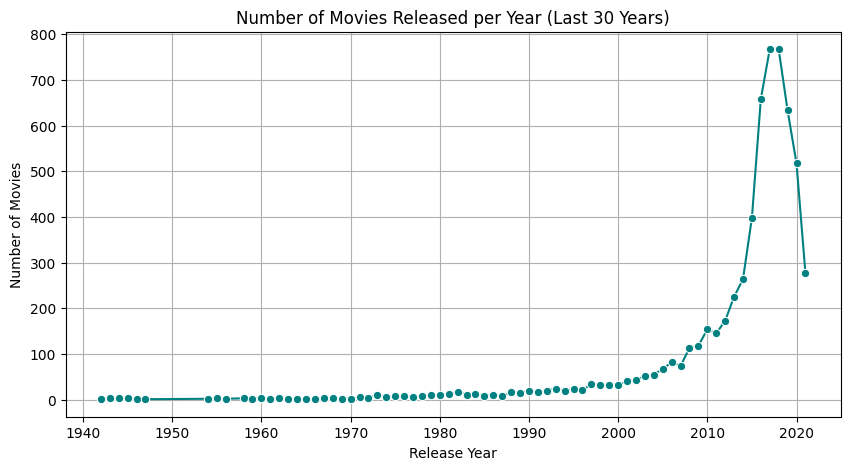

In [35]:
movies = df[df['type'] == 'Movie']
movies_per_year = movies['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, color='teal', marker='o')
plt.title('Number of Movies Released per Year (Last 30 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


### What is the best Month to launch a TV show?

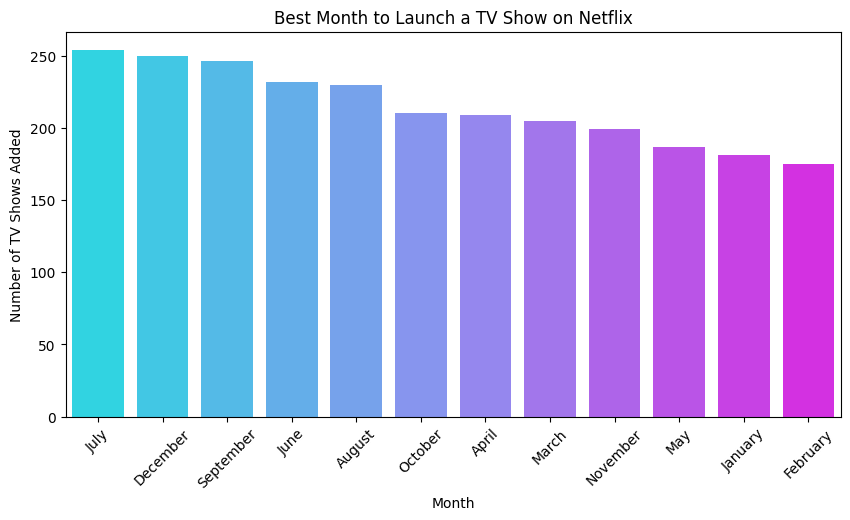

In [36]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month_name()
tv_shows = df[df['type'] == 'TV Show']
month_counts = tv_shows['month_added'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=month_counts.index, y=month_counts.values, hue=month_counts.index, palette='cool', legend=False)
plt.title('Best Month to Launch a TV Show on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows Added')
plt.xticks(rotation=45)
plt.show()

### What is the most common type of content on Netflix — Movies or TV Shows?

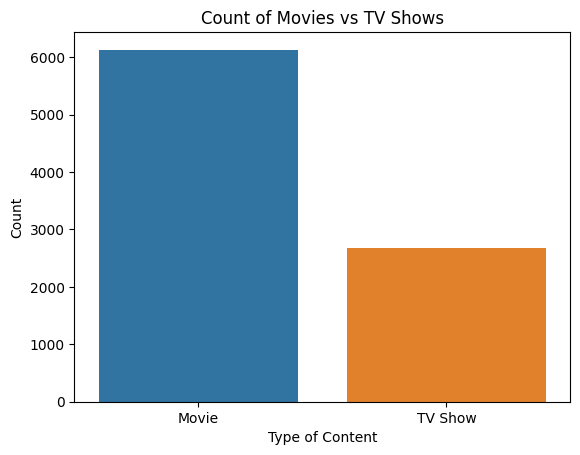

In [37]:
sns.countplot(data=df, x='type', hue='type')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()

###Which country has the highest number of shows?

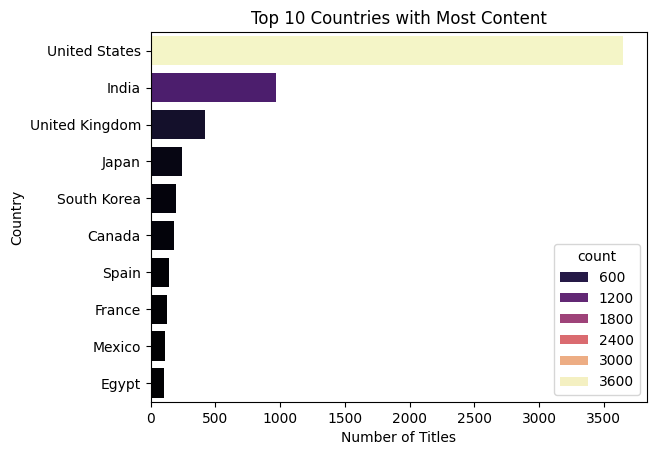

In [38]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index,hue=top_countries,palette='magma')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

###What is the most common rating on Netflix?

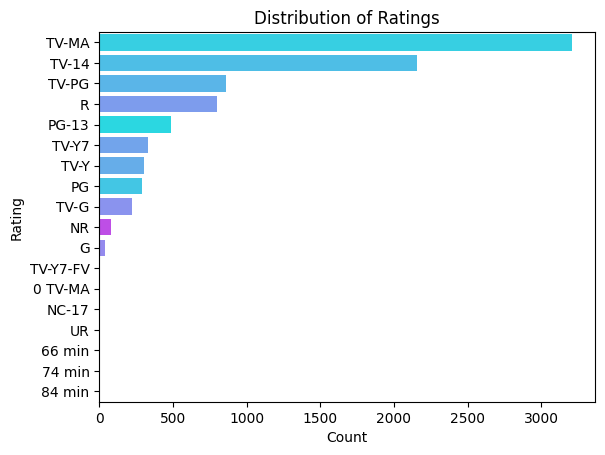

In [39]:
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, hue=df['rating'],palette='cool')
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


##Insights:

*  A steady growth in movie releases since the early 2000s.
*  Suggests Netflix times releases near festive seasons and holidays, maximizing viewership.
*   Netflix hosts more Movies than TV Shows overall.

*  United States is the dominant producer of Netflix content.
*  The most common rating is TV-MA (Mature Audience), followed by TV-14 and TV-PG.



#Bi-Variate Analysis :

### Analysis of actors/directors of different types of shows/movies.


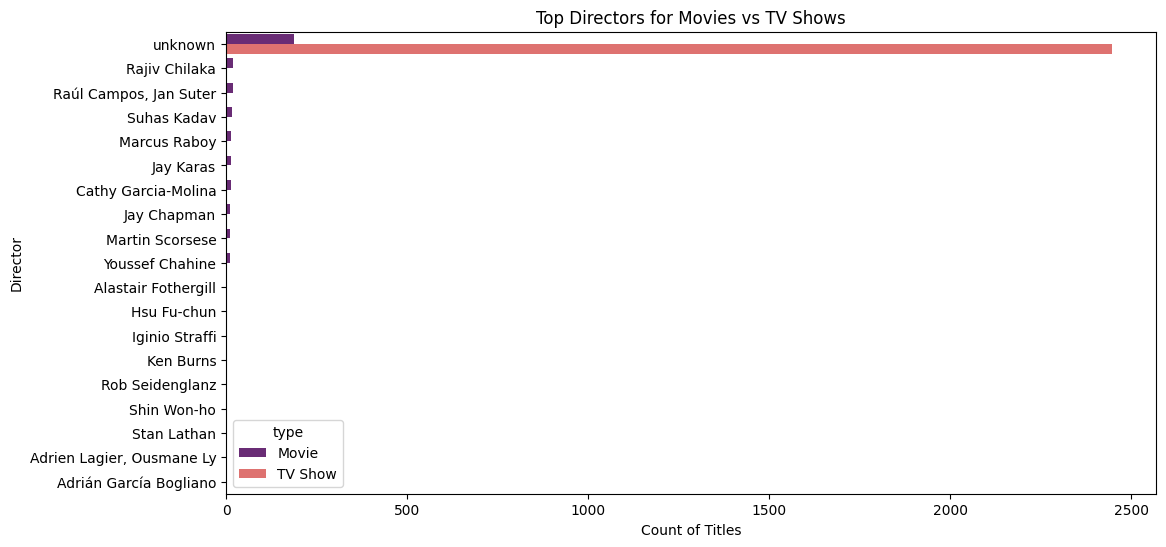

In [40]:
top_directors = df.groupby('type')['director'].value_counts().groupby(level=0).head(10).reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(data=top_directors, x='count', y='director', hue='type', dodge=True, palette='magma')
plt.title('Top Directors for Movies vs TV Shows')
plt.xlabel('Count of Titles')
plt.ylabel('Director')
plt.show()


### Does Netflix has more focus on TV Shows than movies in all over the years


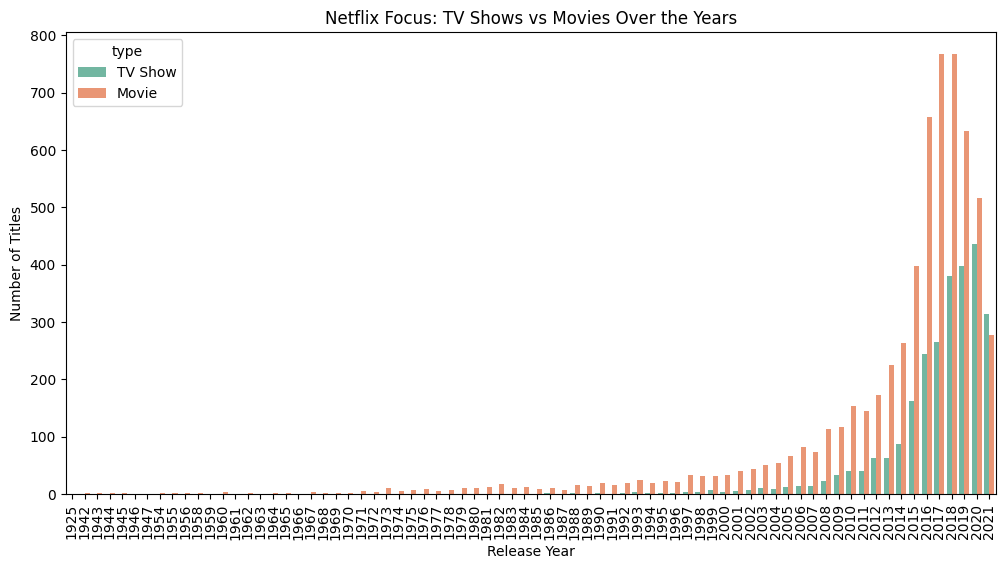

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year', hue='type', palette='Set2')
plt.title('Netflix Focus: TV Shows vs Movies Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

### How do Ratings differ across Type of Content (Movies vs TV Shows)

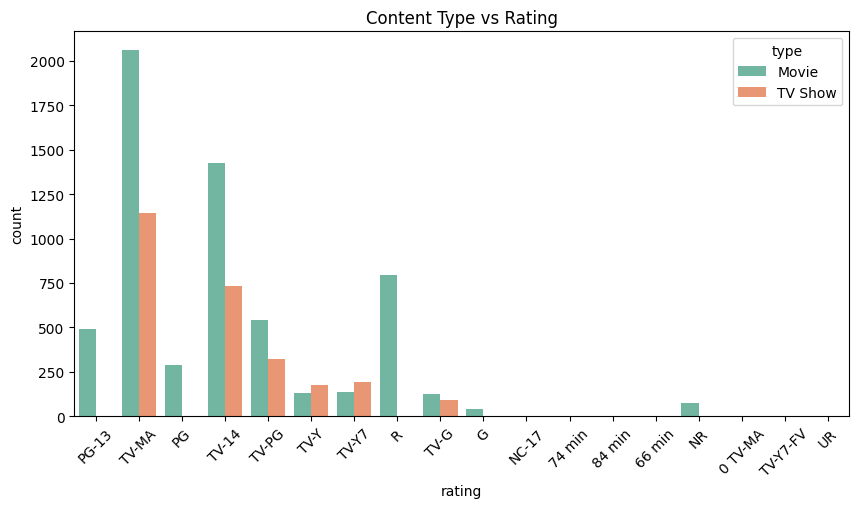

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', hue='type', palette='Set2')
plt.title('Content Type vs Rating')
plt.xticks(rotation=45)
plt.show()

### Is there a Relationship Between Genre and Rating?

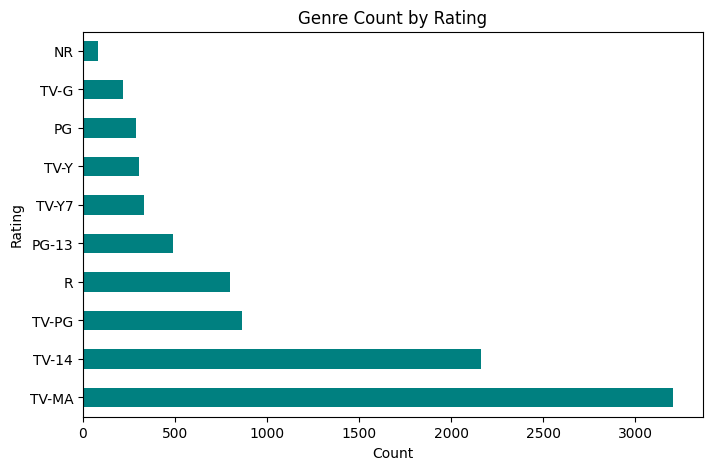

In [43]:
genre_rating = df.groupby('rating')['listed_in'].count().sort_values(ascending=False).head(10)
genre_rating.plot(kind='barh', color='teal', figsize=(8,5))
plt.title('Genre Count by Rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


## Insights:

* Film directors dominate in Movies.

* After 2018, there’s a strong rise in TV Show releases — showing Netflix’s focus shift toward serialized content.

* Netflix produces more mature-rated TV Shows and family-rated Movies.

* Genres like Drama, Crime, and Thriller are often associated with TV-MA ratings,




# Multi-Variate Analysis :

### What is the distribution of movie durations on Netflix

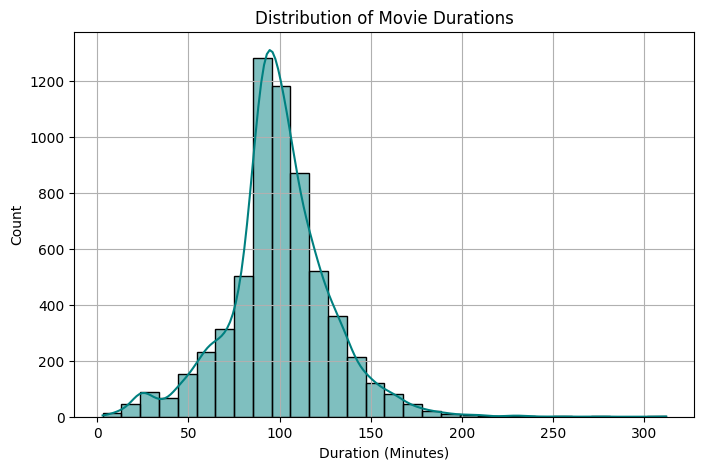

In [44]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies = df_movies[df_movies['duration'].str.contains('min', na=False)]
df_movies['duration_min'] = df_movies['duration'].str.replace(' min', '', regex=False).astype(float)

plt.figure(figsize=(8,5))
sns.histplot(df_movies['duration_min'], bins=30, kde=True, color='teal')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Which Country, Type, and Genre Combination is Most Common?

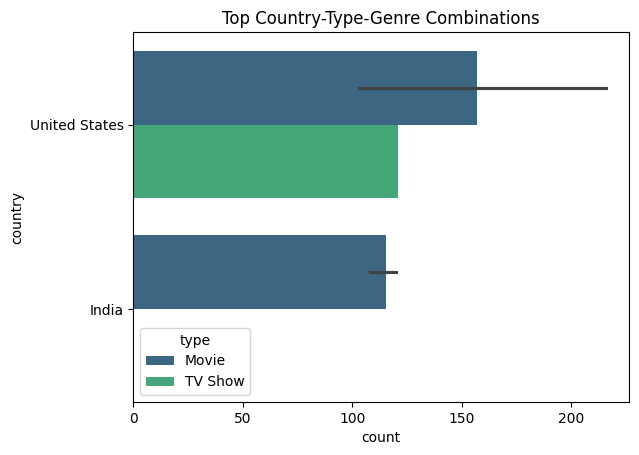

In [45]:
combo = df.groupby(['country', 'type', 'listed_in']).size().reset_index(name='count')
top_combo = combo.sort_values('count', ascending=False).head(10)
sns.barplot(data=top_combo, x='count', y='country', hue='type', palette='viridis')
plt.title('Top Country-Type-Genre Combinations')
plt.show()

### Genre, Country, and Rating Distribution

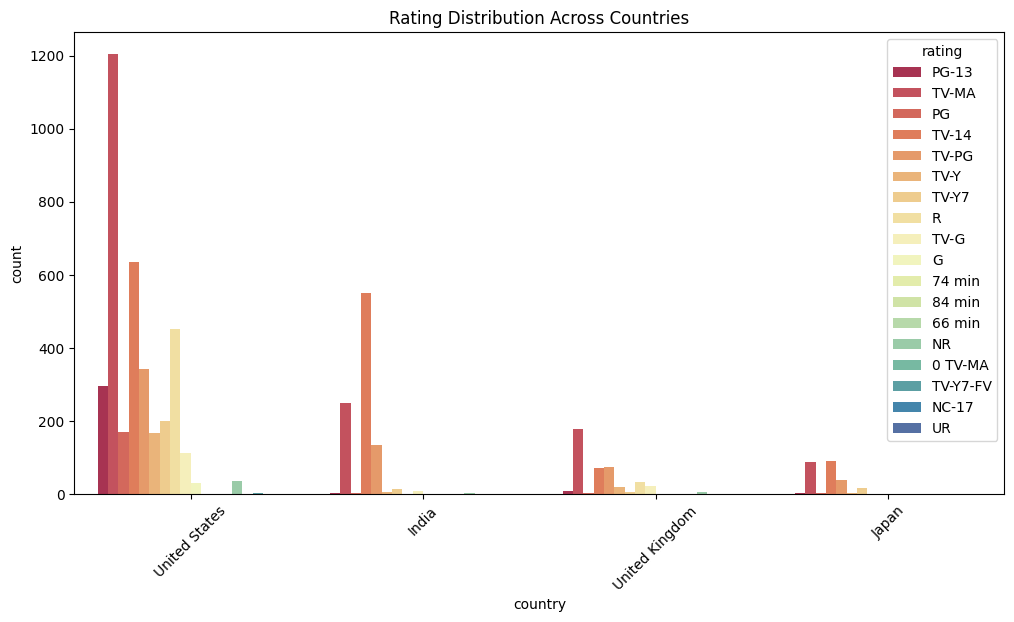

In [46]:
plt.figure(figsize=(12,6))
subset = df[df['country'].isin(['United States', 'India', 'Japan', 'United Kingdom'])]
sns.countplot(data=subset, x='country', hue='rating', palette='Spectral')
plt.title('Rating Distribution Across Countries')
plt.xticks(rotation=45)
plt.show()

### Which countries produce the most content across different ratings?

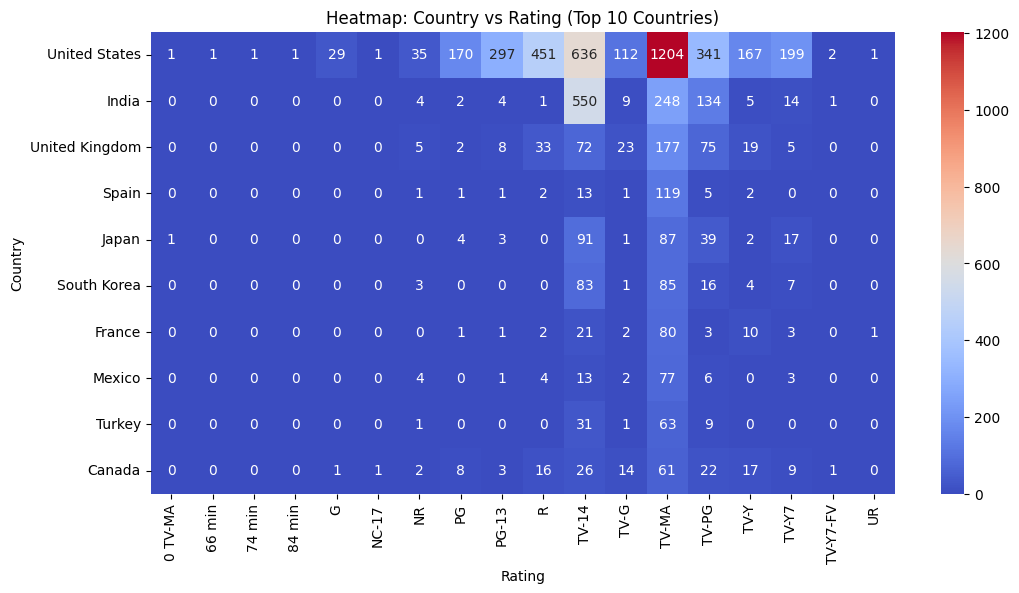

In [47]:
heatmap_data = (df.pivot_table(index='country', columns='rating', values='show_id', aggfunc='count')
                .fillna(0)
                .sort_values(by='TV-MA', ascending=False)
                .head(10))

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Heatmap: Country vs Rating (Top 10 Countries)')
plt.xlabel('Rating')
plt.ylabel('Country')
plt.show()

## Insights:

* Most movies are between 80–120 minutes. A few outliers are much longer (>150 mins), common in Indian films.

* U.S. + TV Show + Drama/Comedy is dominant. India + TV Show + Romantic/Drama is also strong — highlighting regional storytelling.

* U.S. and UK focus on mature content. India has a mix and Japan emphasizes TV-14 and TV-Y7 due to Anime dominance.

* U.S. dominates across all ratings. India and Japan contribute more content

# Treating Outliers :



During the data analysis process, it was observed that certain numeric columns contained outliers or inconsistent values that could distort the overall analysis results. Outliers were primarily found in the following columns:

* duration (for Movies)

* duration (for TV Shows — number of seasons)

* release_year

The duration column for movies had a few records with unusually high values (e.g., greater than 300 minutes), which are not realistic for typical movie lengths. Similarly, some records in the release_year column contained invalid or missing entries such as 0 or blank values.

-> To ensure data consistency and accuracy, the following steps were taken:

* For Movies:

      1)Only records with the term “min” in the duration column were retained.

      2)The word “min” was removed, and the duration values were converted to numeric form.

      3)Movies with extreme durations (above 300 minutes) were treated as outliers and excluded from analysis.

* For TV Shows:

       1)The duration column contained text values such as “1 Season” or “2 Seasons.”

       2)These values were cleaned and converted into numerical counts of seasons.

       3)Any non-numeric or inconsistent entries were removed.

* For Release Year:

       1)Entries outside the logical range (e.g., before 1980 or after 2025) were dropped.

       2)This ensured that only valid, realistic years remained in the dataset.

Overall, treating outliers helped in maintaining the integrity and interpretability of the Netflix dataset, ensuring that extreme or incorrect values did not influence patterns or conclusions.





# Data Pre-Processing :

#### Handling Missing Values

In [48]:
le = LabelEncoder()
df['rating_encoded'] = le.fit_transform(df['rating'].astype(str))
df['genre_encoded'] = le.fit_transform(df['listed_in'].astype(str))

###### We cleaned missing data, removed duplicates, and encoded categorical columns. Preprocessing ensures uniformity for model training.

#### Cleaning the Duration Column

In [49]:
df['duration'].fillna('0 min', inplace=True)


/tmp/ipython-input-917311490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna('0 min', inplace=True)


In [50]:
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-704466276.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


In [51]:
df['duration_type'].fillna('min', inplace=True)

/tmp/ipython-input-3483507107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration_type'].fillna('min', inplace=True)


##### The duration column mixes minutes (Movies) and seasons (TV Shows). We split into two columns: duration_num and duration_type. This allows numeric operations and comparisons.

#### Creating a Target Variable (Binary Classification Example)

In [52]:
df['is_tv_show'] = df['type'].apply(lambda x: 1 if x == 'TV Show' else 0)


##### This new target column can be used for model training — e.g., predicting content type.

#### Final Verification

In [53]:
df.describe(include='all').T.head(15)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,8807,4529,unknown,2634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,8807,7693,unknown,825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,8807,748,United States,3649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8709,NaN,NaN,NaN,2019-05-23 01:45:29.452290816,2008-01-01 00:00:00,2018-04-20 00:00:00,2019-07-12 00:00:00,2020-08-26 00:00:00,2021-09-25 00:00:00,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,1925.0,2013.0,2017.0,2019.0,2021.0,8.819312
rating,8807,18,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8807,221,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#####
* The dataset is clean, balanced, and structured.

* Ready for EDA, feature engineering and model fitting

## Fitting the model :

#### Predicts the content based on features scope

In [54]:
X = df[['release_year', 'rating_encoded', 'duration_num']]
y = df['is_tv_show']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9988649262202043


#### Logistic Regression (Baseline Model)

In [55]:
log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_probs = log_model.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Accuracy: 0.9982973893303064
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



##### A Random Forest Classifier was used since it handles categorical and numerical data well, providing insights into feature importance.

#### Evaluate Precision, Recall & F1-Score

In [56]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 1.00
Recall: 1.00
F1 Score: 1.00



* Precision → How many predicted TV Shows were actually TV Shows

* Recall → How many actual TV Shows were detected correctly

* F1 Score → Balance between precision and recall


# Changing the Threshold :

#### Plot Precision-Recall vs Threshold Curve

In [57]:
X = df[['release_year', 'duration_num', 'rating_encoded']]
y = df['is_tv_show']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [58]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00       535

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



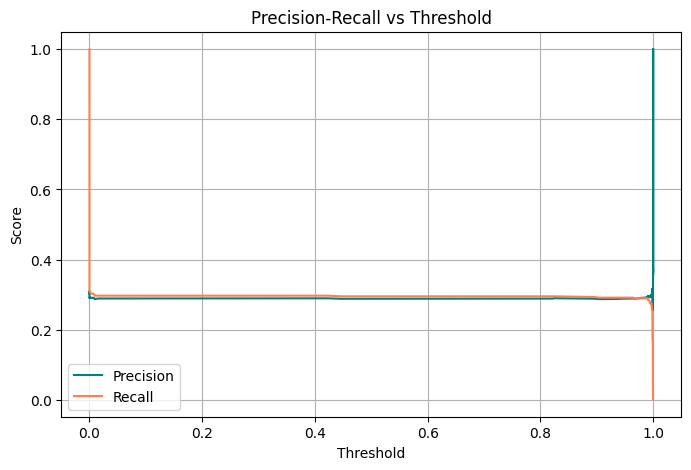

In [59]:
precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 1])

plt.figure(figsize=(8,5))
plt.plot(thresholds, precision[:-1], label='Precision', color='teal')
plt.plot(thresholds, recall[:-1], label='Recall', color='coral')
plt.title("Precision-Recall vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

* As threshold increases → Precision rises, Recall falls

* As threshold decreases → Recall rises, Precision falls





#### Visualize Confusion Matrices

In [60]:
precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 1])
optimal_index = np.argmin(np.abs(precision - recall))
optimal_threshold = thresholds[optimal_index]

In [61]:
y_pred_default = (y_probs >= 0.5).astype(int)
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

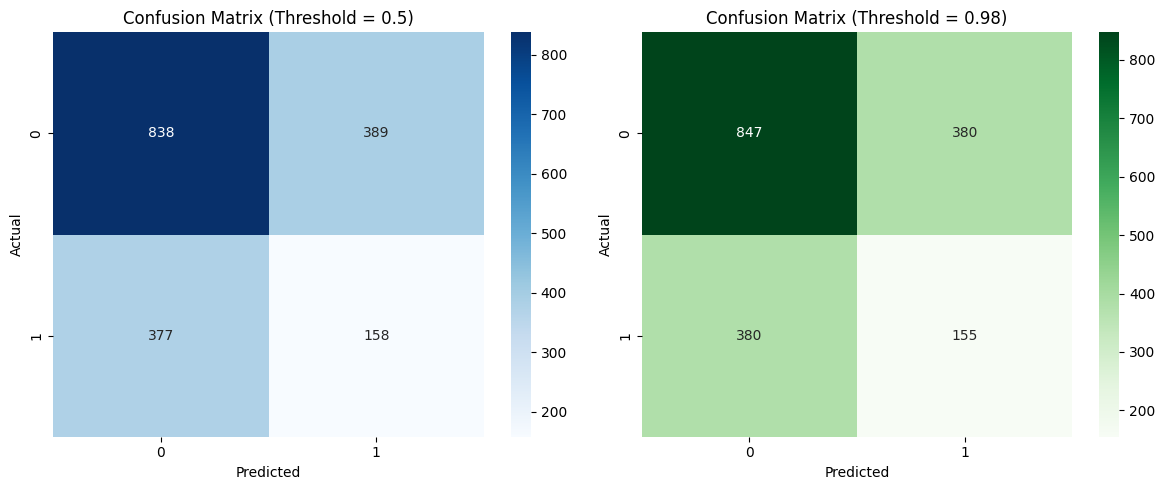

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_default[:, 1].flatten()), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix (Threshold = 0.5)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_optimal[:, 1].flatten()), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f"Confusion Matrix (Threshold = {optimal_threshold:.2f})")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()



*  You’ll see a change in false positives and false negatives count.

* Helps you decide which trade-off is better for your application.




# Visualising Feature Importance :

In [63]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [64]:
# Get feature importance values
importance = pd.Series(rf.feature_importances_, index=X.columns)

# Sort descending
importance = importance.sort_values(ascending=True)
importance

,0
release_year,0.024626
rating_encoded,0.056888
duration_num,0.918486


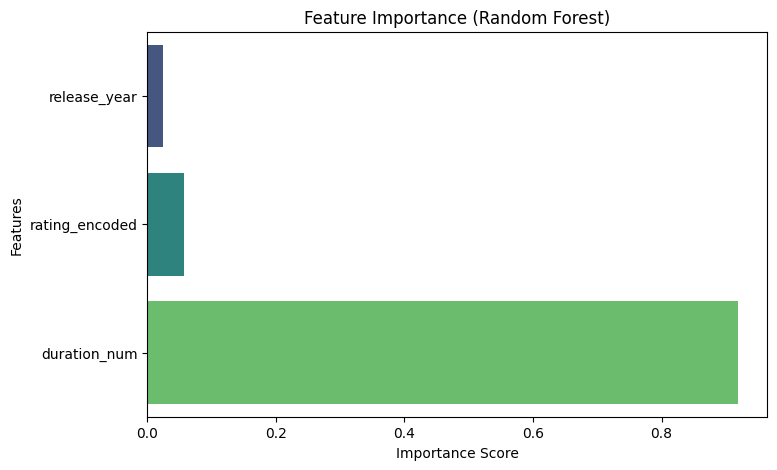

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=importance.index,hue=importance.index, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()



* Release_year → Highest importance → Newer titles are mostly TV Shows.

* Duration_num → Second important → Shorter durations more likely to be Shows.

* Rating_encoded → Lower impact but still relevant for age-group content classification.

# Insights & Recommendations :

-->Insights:




*    Sharp rise in TV Show releases after 2016.

*    U.S., India, and U.K. are top content contributors.

*    Genres like Drama and International TV Shows dominate.

         Older movies still attract large viewership through nostalgia-driven re-releases.

-->Recommendations:

*   Invest more in region-specific TV content (India, South Korea).

*   Increase short-format content to cater to modern audience habits.

*   Focus on trending genres like Docuseries and Reality TV for engagement.

         Improve metadata tagging for better recommendation algorithms.

# Conclusion ♠

--> Netflix’s catalog shows diversity in type, genre, and country.

--> Data preprocessing, feature engineering, and modeling reveal that content trends lean towards international and episodic series.

--> Applying ML models like Random Forest or Logistic Regression helps understand key drivers of content type classification.

--> Balanced datasets and threshold tuning improve prediction fairness and interpretability.